<a href="https://colab.research.google.com/github/Hamiltonfelipe/Hamilton-Felipe/blob/main/an%C3%A1lise_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

In [88]:
import pandas as pd
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [89]:
Dados=pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [90]:
Dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [91]:
#numero de dados
n=Dados.shape[0]
n

76840

In [92]:
k=1+(10/3)*np.log10(n)
k= int(k.round(0))
k

17

### 2º Definir os labels das classes

In [93]:
labels=['f--','f-','f','e','d','c','b','a','a+','a++','s','s+','ss','ss+', 's++','ss++','sss']

### 3º Construir a coluna de frequências

In [94]:
categorico=pd.value_counts(pd.cut(x=Dados.Renda, bins=17,labels=labels,include_lowest= True),sort= False)

<ipython-input-94-a286346297aa>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  categorico=pd.value_counts(pd.cut(x=Dados.Renda, bins=17,labels=labels,include_lowest= True),sort= False)


### 4º Construir a coluna de percentuais

In [95]:
percentual=pd.value_counts(pd.cut(x=Dados.Renda, bins=17,labels=labels,include_lowest= True),sort= False, normalize= True)*100

<ipython-input-95-0b89d503e62b>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual=pd.value_counts(pd.cut(x=Dados.Renda, bins=17,labels=labels,include_lowest= True),sort= False, normalize= True)*100


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [96]:
d_frequencia_quantativa = pd.DataFrame({'Classes' : categorico, 'Porcentagem (%)' : percentual}).sort_index(ascending=False)
d_frequencia_quantativa

,Classes,Porcentagem (%)
Renda,,
sss,3,0.003904
ss++,0,0.000000
s++,0,0.000000
ss+,0,0.000000
ss,0,0.000000
s+,0,0.000000
s,1,0.001301
a++,0,0.000000
a+,6,0.007808


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<ipython-input-97-5ff4a14701d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  grafico= sns.distplot(d_frequencia_quantativa)


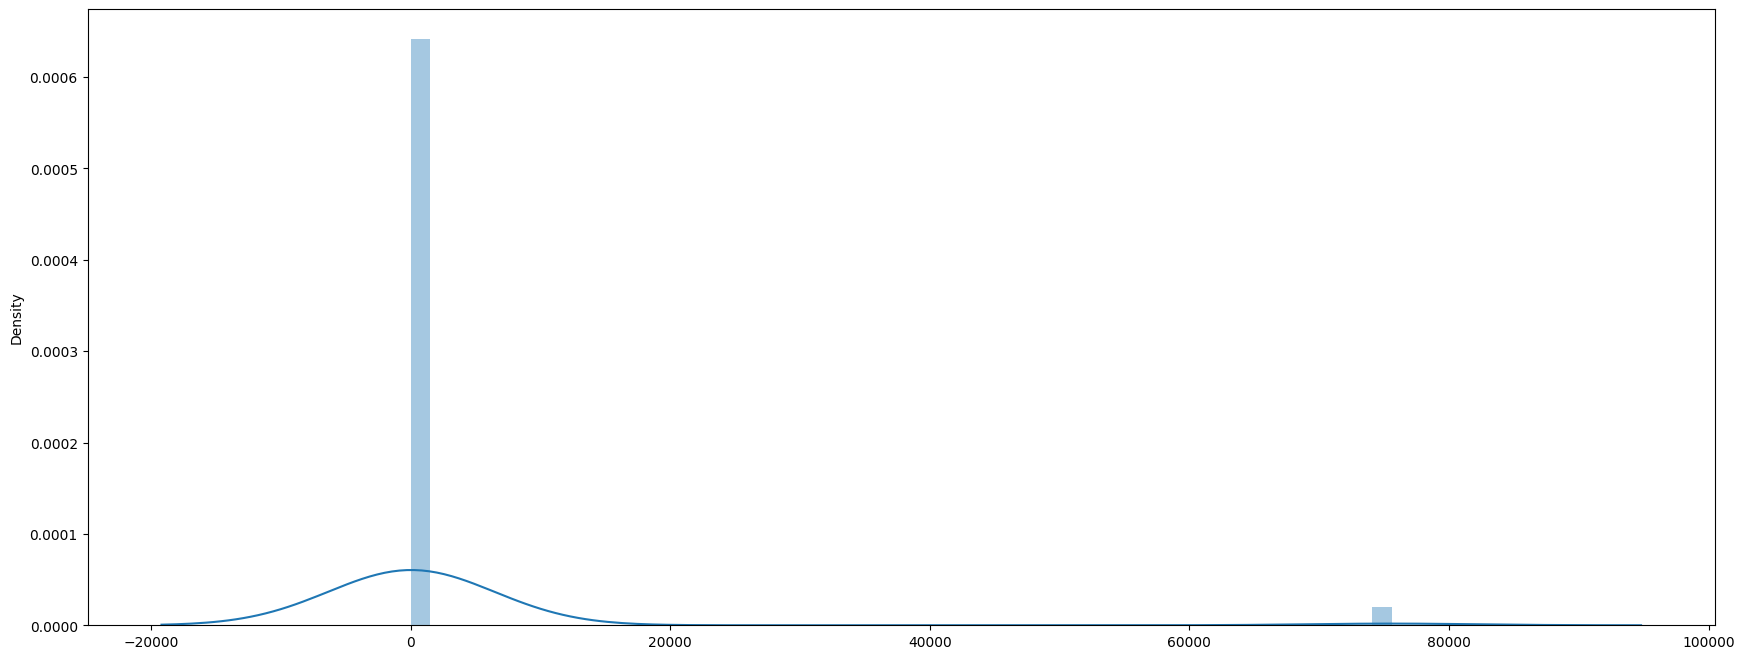

In [97]:
grafico= sns.distplot(d_frequencia_quantativa)
grafico.figure.set_size_inches(21,8)

# Forma correta

In [98]:
classes=[0,1576,3152,7880,15760,200000]
labels=['E', 'D', 'C', 'B', 'A']

In [99]:
Serie_classes=pd.cut(x= Dados.Renda, bins= classes, labels= labels, include_lowest= True)
Serie_classes

,Renda
0,E
1,E
2,E
3,C
4,E
...,...
76835,E
76836,E
76837,E
76838,E


In [100]:
quantificação=pd.value_counts(Serie_classes)

<ipython-input-100-3739ed89a190>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  quantificação=pd.value_counts(Serie_classes)


In [101]:
percentual_classes=pd.value_counts(Serie_classes, normalize=True)*10
percentual_classes

<ipython-input-101-8c18fe7f53c8>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual_classes=pd.value_counts(Serie_classes, normalize=True)*10


,proportion
Renda,
E,6.475143
D,2.173347
C,0.988938
B,0.283446
A,0.079125


In [102]:
dist_frequencia_quantativa_p = pd.DataFrame({'Classes' : quantificação, 'Porcentagem (%)' : percentual_classes}).sort_index(ascending=False)
dist_frequencia_quantativa_p

,Classes,Porcentagem (%)
Renda,,
A,608,0.079125
B,2178,0.283446
C,7599,0.988938
D,16700,2.173347
E,49755,6.475143


<ipython-input-103-297d8cf49f53>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  grafico= sns.distplot(dist_frequencia_quantativa_p)


Text(0, 0.5, 'Porcentagem')

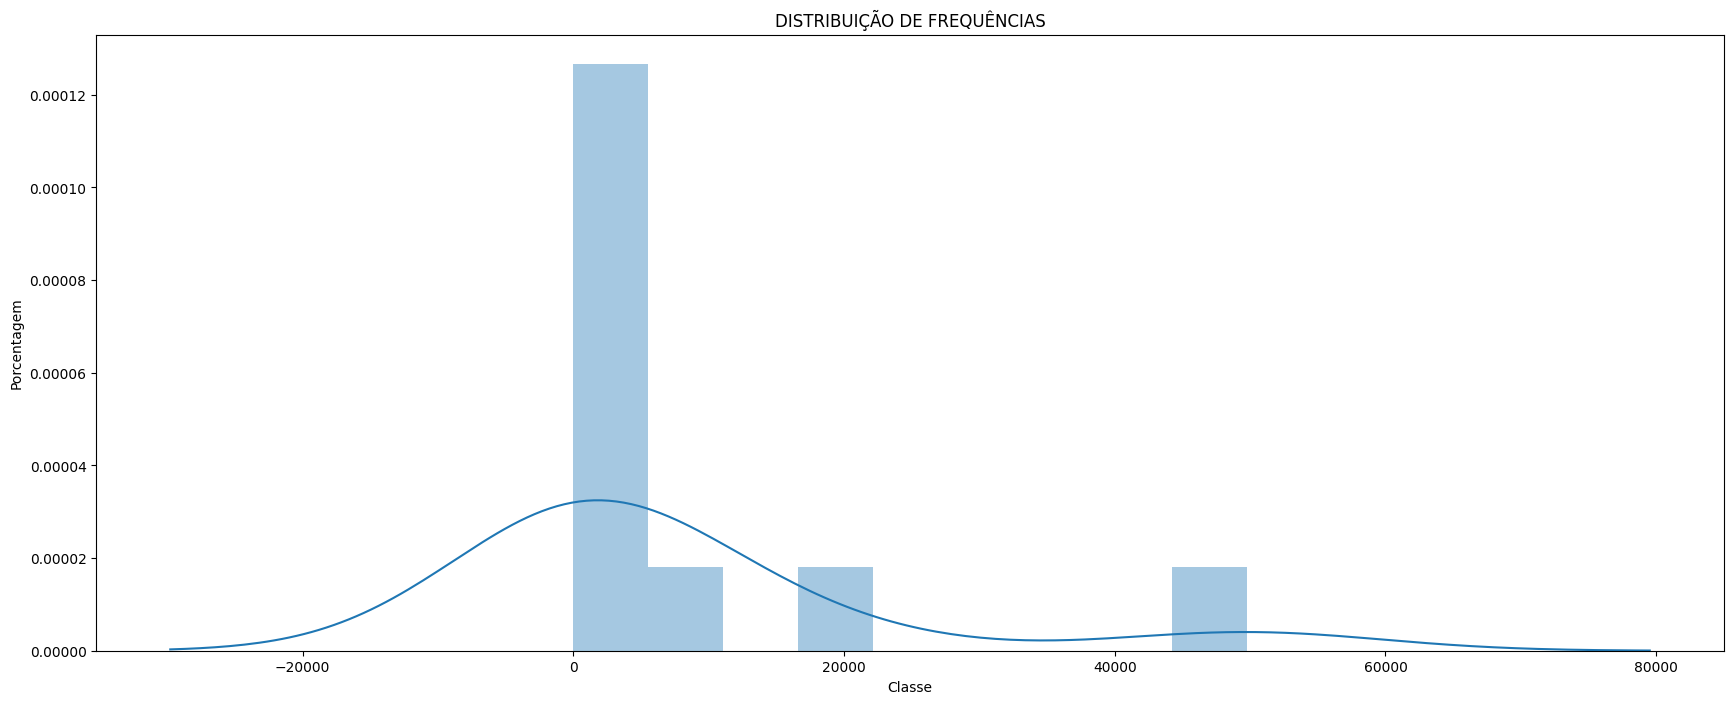

In [103]:
grafico= sns.distplot(dist_frequencia_quantativa_p)
grafico.figure.set_size_inches(21,8)
grafico.set_title('DISTRIBUIÇÃO DE FREQUÊNCIAS')
grafico.set_xlabel('Classe')
grafico.set_ylabel('Porcentagem')

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [104]:
Dados.Cor.mode()

,Cor
0,8


In [105]:
Dados.Cor.median()

4.0

<ipython-input-106-9b4c6e27a407>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  H_renda=sns.distplot(Dados.Cor)


Text(0, 0.5, 'porcentagem populacional')

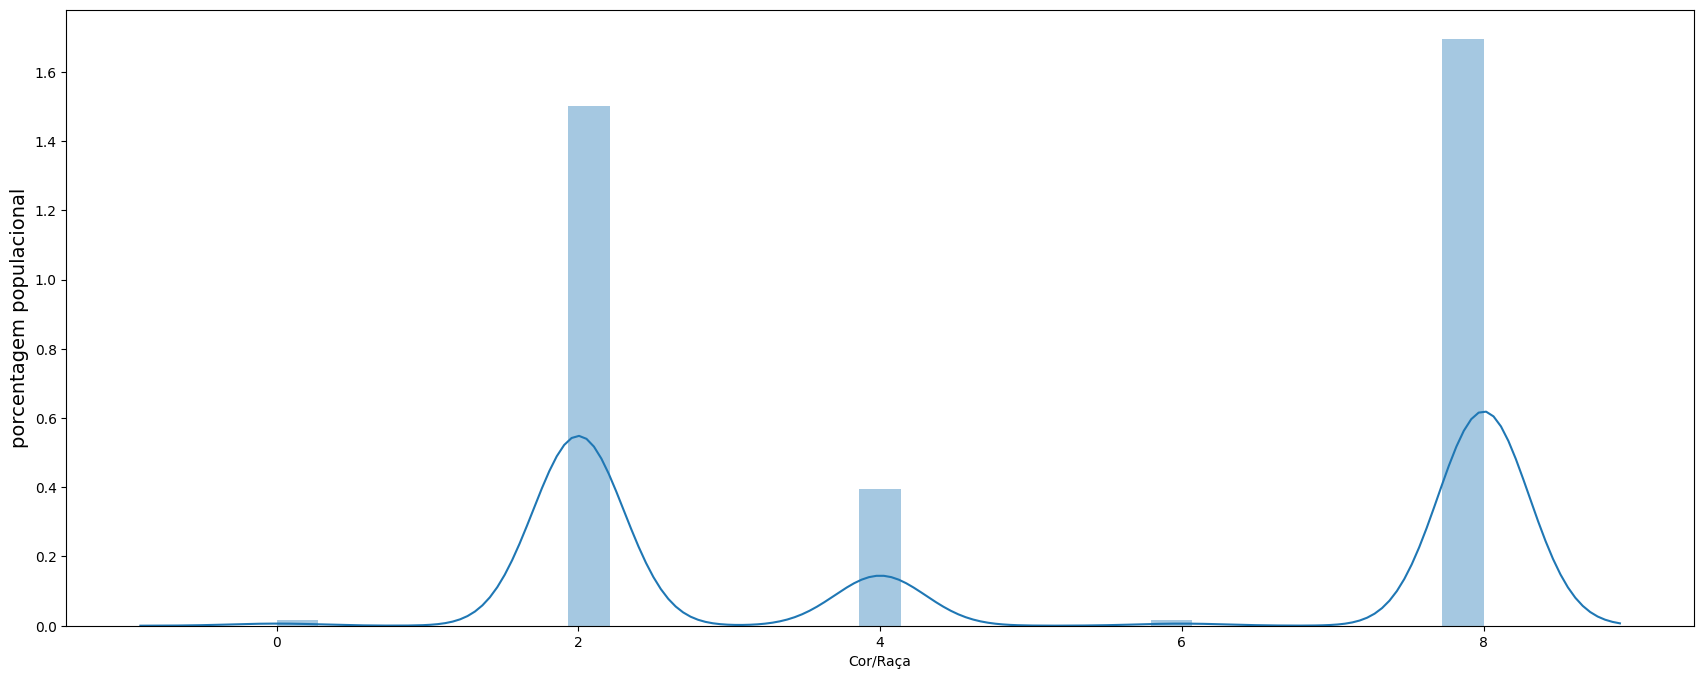

In [106]:
H_renda=sns.distplot(Dados.Cor)
H_renda.figure.set_size_inches(21,8)
H_renda.set_xlabel('Cor/Raça')
H_renda.set_ylabel('porcentagem populacional', fontsize= 14)

<ipython-input-107-c0fe4a32f968>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(Dados.Altura,)


Text(0.5, 0, 'Metros')

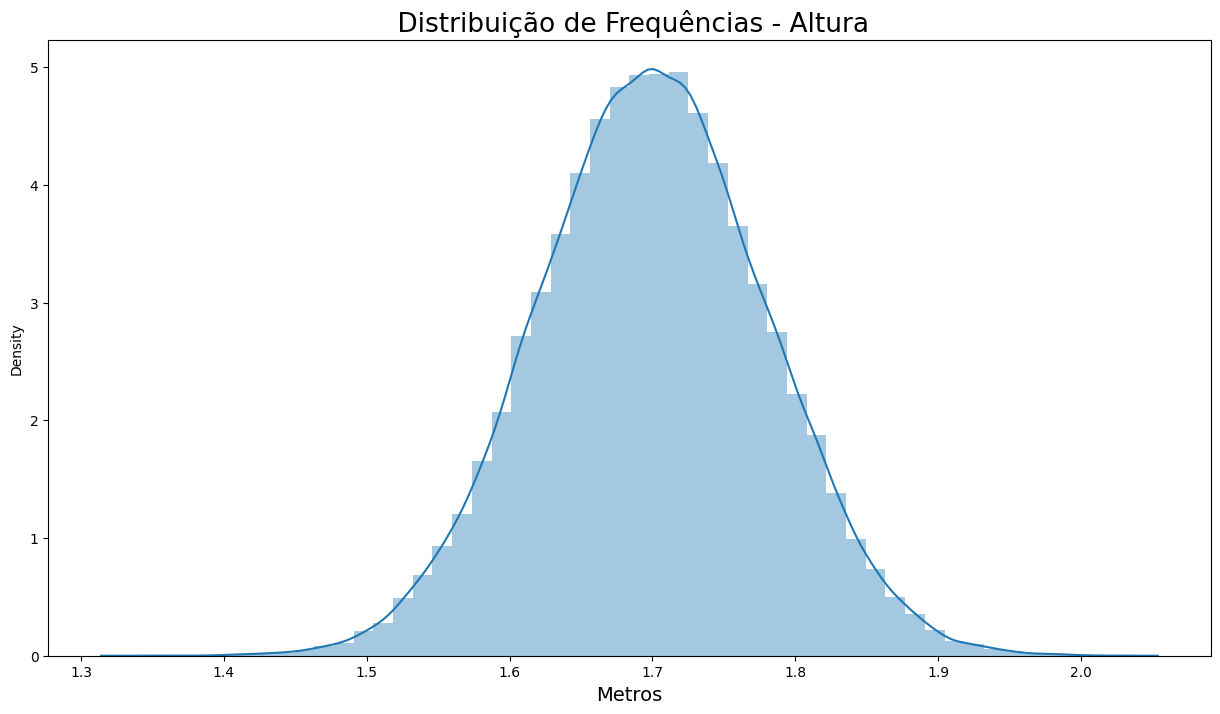

In [107]:
ax= sns.distplot(Dados.Altura,)
# configurar o tamanho
ax.figure.set_size_inches(15,8)
# introduzindo o titulo
ax.set_title(" Distribuição de Frequências - Altura", fontsize= 19)
ax.set_xlabel("Metros", fontsize= 14)

<ipython-input-108-9e342c595d52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  REMTC_a_e= sns.distplot(Dados.UF)


Text(0, 0.5, ' porcentagem populacional ')

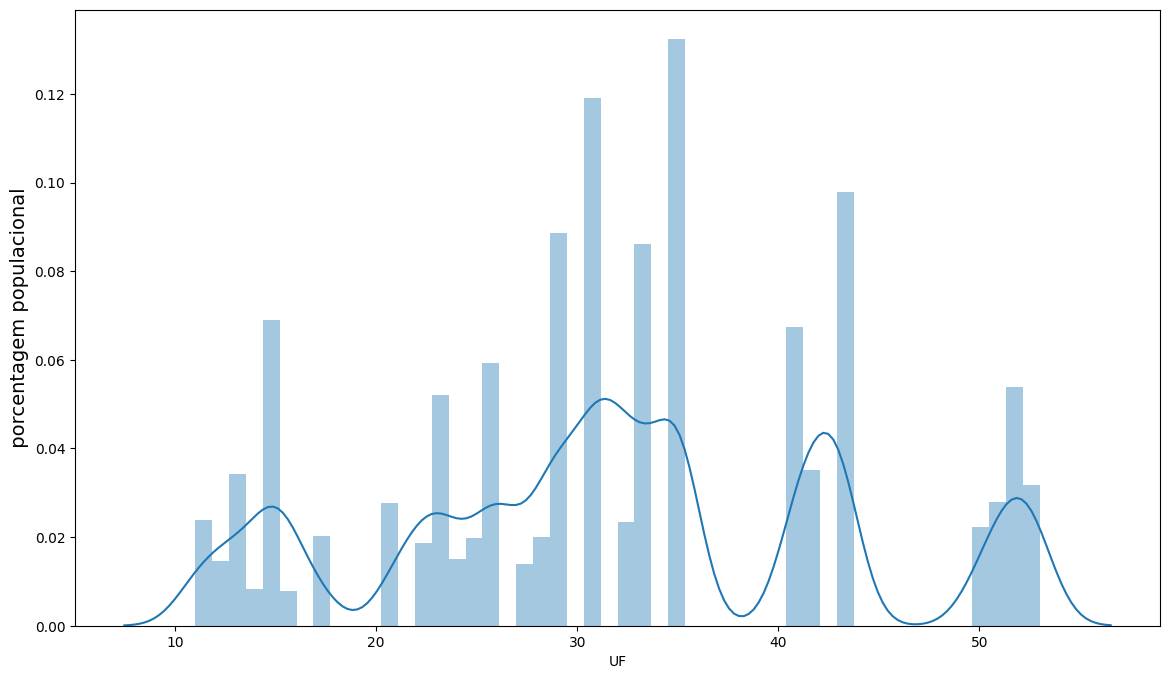

In [108]:
REMTC_a_e= sns.distplot(Dados.UF)
REMTC_a_e.figure.set_size_inches(14,8)
REMTC_a_e.set_ylabel(' porcentagem populacional ', fontsize= 14)

> ### Conclusões

Escreva suas conclusões aqui...
 Podemos ver q a maioria dos conjuntos de dados desta pesquisa se comporta em uma simétria à esquerda, por serem de natureza extremamente diversa dificultando assim uma distribuição harmônica

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-109-fe1f61e0417e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  REMTC= sns.distplot(Dados.query('Renda < 20000').Renda)


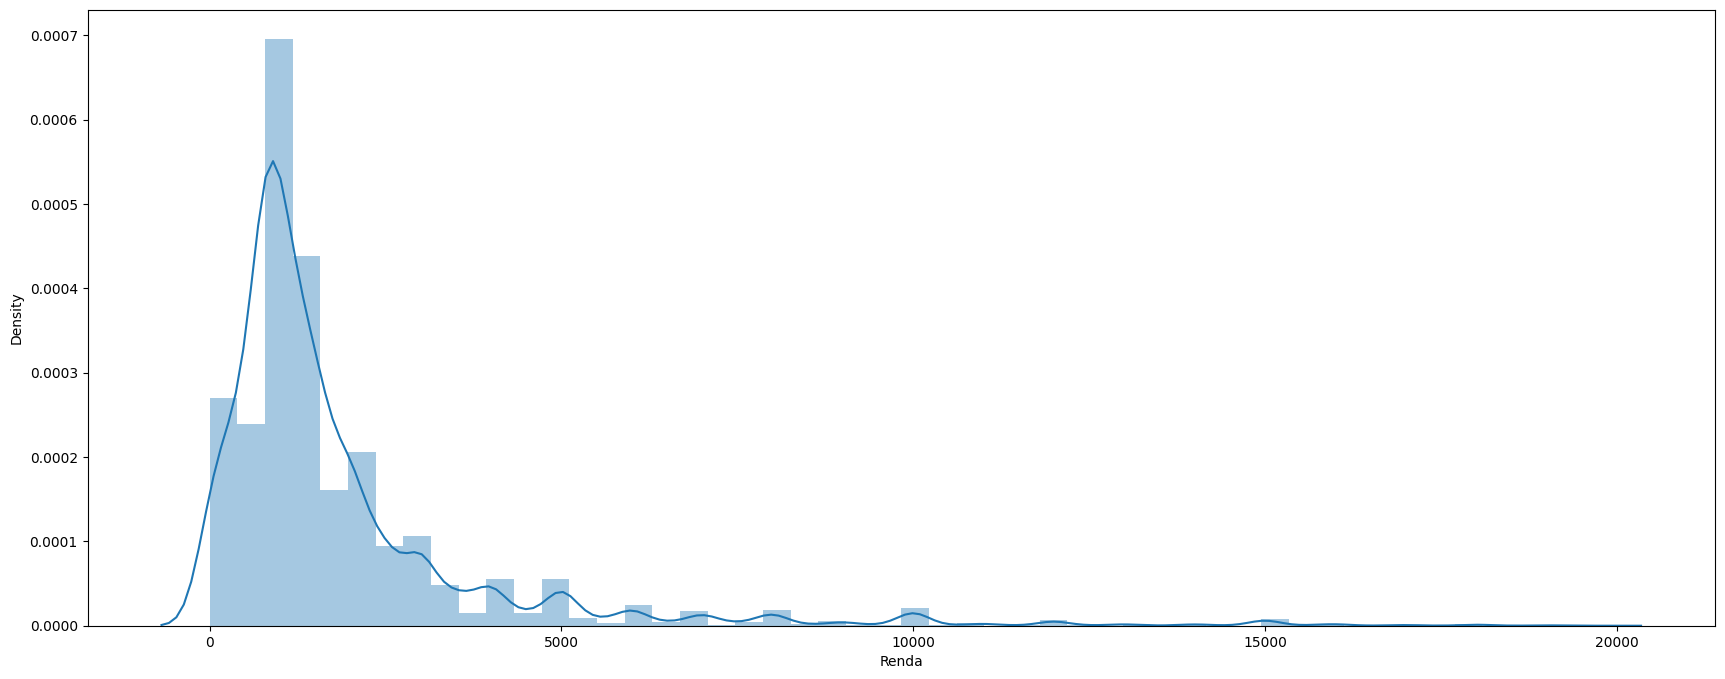

In [109]:
REMTC= sns.distplot(Dados.query('Renda < 20000').Renda)
REMTC.figure.set_size_inches(21,8)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>


In [110]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [111]:
freq = pd.crosstab(Dados.Sexo, Dados['Anos de Estudo'])
freq.rename(index = sexo, inplace= True )
freq.rename(columns= anos_de_estudo, inplace= True )
freq

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,4476,1081,1637,2227,5020,3247,1790,1942,5700,1287,1499,13933,1173,827,819,6487,105
Feminino,1373,307,464,664,1709,1252,655,747,2280,553,619,6915,663,426,569,4308,86


In [112]:
f_uf = pd.crosstab(Dados.Sexo, Dados.UF)
f_uf.rename(index = sexo, inplace= True )
f_uf.rename(columns= uf, inplace= True )
f_uf

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Sexo,,,,,,,,,,,,,,,,,,,,,
Masculino,1138,698,1518,354,3146,330,958,1197,857,2227,...,1098,3618,5892,3129,1723,4246,987,1296,2580,1253
Feminino,399,239,688,186,1303,182,348,590,354,1132,...,413,1938,2652,1227,552,2076,453,504,898,801


In [113]:
f_cor = pd.crosstab(Dados.Sexo, Dados.Cor)
f_cor.rename(index = sexo, inplace= True )
f_cor.rename(columns= cor, inplace= True )
f_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [114]:
f_cor_per = pd.crosstab(Dados.Sexo, Dados.Cor, normalize= True)*100
f_cor_per.rename(index = sexo, inplace= True )
f_cor_per.rename(columns= cor, inplace= True )
f_cor_per

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [115]:
Dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [116]:
Dados.Renda.median()

1200.0

### Obtenha a moda

In [117]:
Dados.Renda.mode()

,Renda
0,788


### Obtenha o desvio médio absoluto

In [118]:
Renda= Dados.Renda

In [119]:
(Renda - Renda.mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [120]:
Dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [121]:
Dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destacando os pontos mais importante nas tabulações</font>


In [122]:
Dados_CS_md=pd.crosstab(Dados.Sexo,Dados.Cor,Dados.Renda,aggfunc={'mean'})
Dados_CS_md.rename(index=sexo, inplace= True)
Dados_CS_md.rename(columns=cor, inplace= True)
Dados_CS_md

mean                                                    
Cor           Indígena       Branca        Preta      Amarela        Parda
Sexo                                                                      
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516

In [123]:
Dados_CS_mx=pd.crosstab(Dados.Sexo,Dados.Cor,Dados.Renda,aggfunc={'max'})
Dados_CS_mx.rename(index=sexo, inplace= True)
Dados_CS_mx.rename(columns=cor, inplace= True)
Dados_CS_mx

max                               
Cor       Indígena  Branca  Preta Amarela   Parda
Sexo                                             
Masculino    10000  200000  50000   50000  100000
Feminino    120000  100000  23000   20000   30000

In [124]:
Dados_CS_mdn=pd.crosstab(Dados.Sexo,Dados.Cor,Dados.Renda,aggfunc={'median'})
Dados_CS_mdn.rename(index=sexo, inplace= True)
Dados_CS_mdn.rename(columns=cor, inplace= True)
Dados_CS_mdn

median                                
Cor       Indígena  Branca   Preta Amarela   Parda
Sexo                                              
Masculino    797.5  1700.0  1200.0  2800.0  1200.0
Feminino     788.0  1200.0   800.0  1500.0   800.0

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destacando os pontos mais importante que você observa nas tabulações</font>


In [125]:
Dados_CS=pd.crosstab(Dados.Sexo,
                     Dados.Cor,
                     Dados.Renda,
                     aggfunc={lambda x: (x - x.mean()).abs().mean()}).round(2)

Dados_CS.rename(index=sexo, inplace= True)
Dados_CS.rename(columns=cor, inplace= True)
Dados_CS.rename(columns={'<lambda>':'Mad'}, inplace=True)
Dados_CS

Mad                                   
Cor       Indígena   Branca   Preta  Amarela    Parda
Sexo                                                 
Masculino   798.91  2261.01  975.60  3709.60  1125.83
Feminino   3007.89  1670.97  705.45  2549.15   811.58

In [126]:
Dados_CS=pd.crosstab(Dados.Sexo,Dados.Cor,Dados.Renda,aggfunc={'var'})
Dados_CS.rename(index=sexo, inplace= True)
Dados_CS.rename(columns=cor, inplace= True)
Dados_CS

var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

In [127]:
Dados_CS=pd.crosstab(Dados.Sexo,Dados.Cor,Dados.Renda,aggfunc={'std'})
Dados_CS.rename(index=sexo, inplace= True)
Dados_CS.rename(columns=cor, inplace= True)
Dados_CS

std                                                   
Cor            Indígena       Branca        Preta     Amarela        Parda
Sexo                                                                      
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados?.</font>


<ipython-input-128-8d0458a0eeaa>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([key for key in cor.values()], fontsize=12)


Text(0.5, 1.0, 'Renda por cor e sexo')

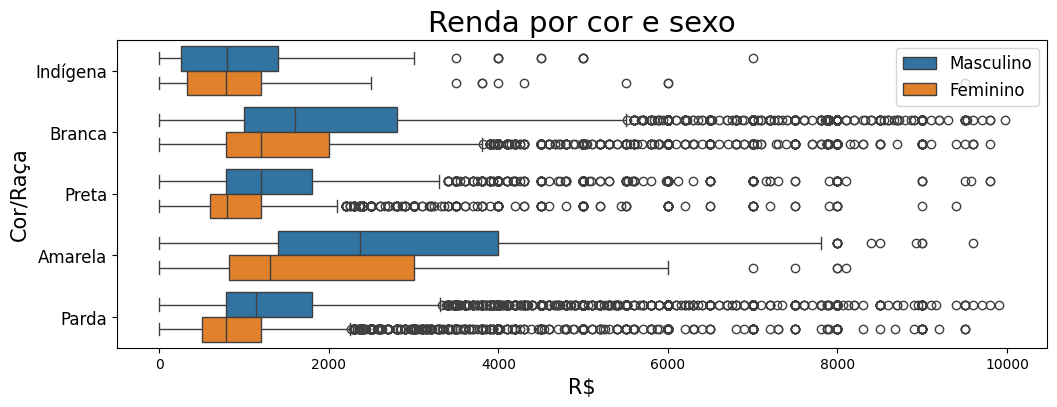

In [128]:
ax = sns.boxplot( x = 'Renda', y=Dados.Cor , data = Dados.query('Renda < 10000'),hue='Sexo' , orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_yticklabels([key for key in cor.values()], fontsize=12)
ax.set_ylabel('Cor/Raça',fontsize=15)
ax.set_xlabel('R$',fontsize=15)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ax.set_title('Renda por cor e sexo',fontsize=21)


### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?


In [140]:
from scipy import stats
per_788=stats.percentileofscore(Dados.Renda, 788, kind= 'weak')
print("{0:.2f}%".format(per_788))

28.87%


In [141]:
per_788_strt=stats.percentileofscore(Dados.Renda, 788, kind= 'strict')
print("{0:.2f}%".format(per_788_strt))

19.91%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?


In [135]:
valor = Dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtendo a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO



In [136]:
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(Dados['Anos de Estudo'],
                                                   Dados.Sexo,
                                                   aggfunc = {'mean', 'median', 'max', 'std'},
                                                   values = Dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_e_estudo.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_estudo

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construindo um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar um comportamento diferenciado no rendimento entre os grupos de pessoas analisados.</font>


<ipython-input-137-a04f8eed1bda>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_2.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y


<Axes: title={'center': 'Box-plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='R$', ylabel='Anos de Estudo'>

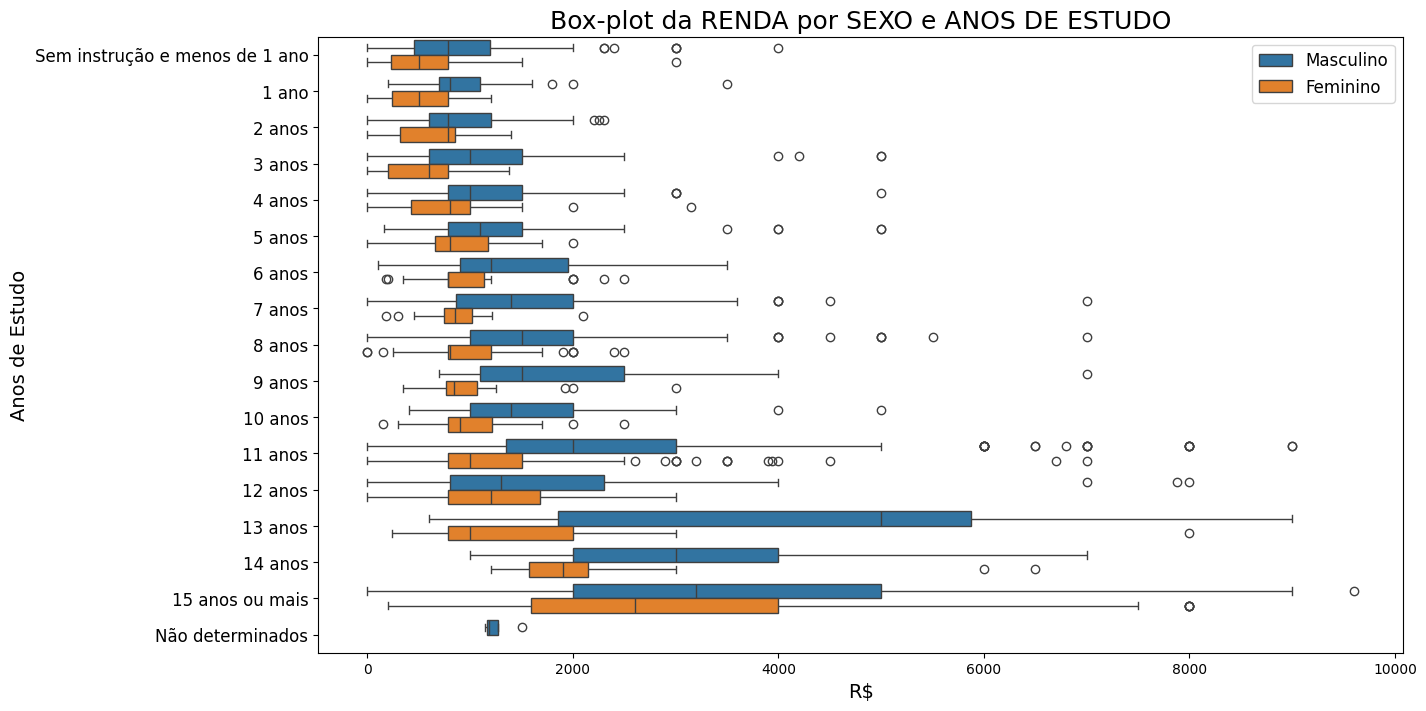

In [137]:
ax_2 = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=Dados.query('Renda < 10000 and Idade == 50'), orient='h')

ax_2.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax_2.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax_2.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax_2.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax_2.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax_2.get_legend_handles_labels()
ax_2.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax_2

> ### Conclusões

Escreva suas conclusões aqui...

### Obtendo a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO


In [138]:
renda_estatisticas_por_uf = Dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construindo um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO


<ipython-input-139-cb0005ad0270>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_uf.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y


<Axes: title={'center': 'Box-plot da RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

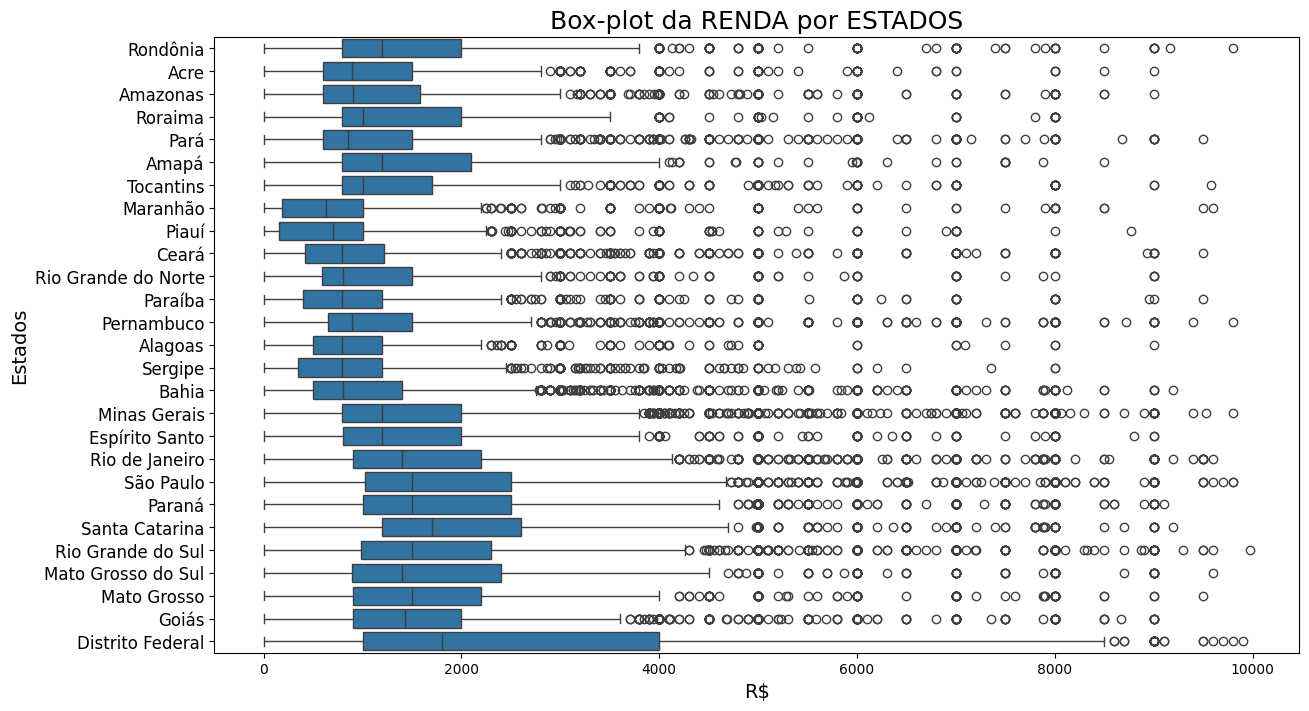

In [139]:
ax_uf = sns.boxplot(x = 'Renda', y = 'UF', data=Dados.query('Renda < 10000'), orient='h')

ax_uf.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax_uf.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax_uf.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax_uf.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax_uf.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax_uf

> ### Conclusões

Escreva suas conclusões aqui...